In [3]:
#rfg tog = 0
#dry_move-tog = 0
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d as plt3d
import numpy as np
from scipy.fft import fft, ifft, fftfreq

In [4]:
def get_data(int_time_step, final_time_step, particles):
    t = int_time_step #current time step
    p = particles
    ts = final_time_step - int_time_step + 1
    x_data = np.zeros((ts, p, 2)) # index is (time steps, particles, z-coord 1st "layer" is pos, 2nd is dist)
    y_data = np.zeros((ts, p, 2)) 
    z_data = np.zeros((ts, p, 2)) 
    t_step = np.array(range(ts)) #creates array the length of time steps 
    p_id = np.zeros((ts, p))
    while t <= (int_time_step + ts-1):
        amrex_ds = AMReXDataset('cplt000000'+str(t))
        ad = amrex_ds.all_data()
        raw_pos_x = ad['particles', 'particle_position_x'].v
        x_data[t-int_time_step,:p,0] = (raw_pos_x)
        raw_pos_y = ad['particles', 'particle_position_y'].v
        y_data[t-int_time_step,:p,0] = (raw_pos_y)
        raw_pos_z = ad['particles', 'particle_position_z'].v
        z_data[t-int_time_step,:p,0] = (raw_pos_z)
        raw_dist_x = ad['particles', 'particle_ax'].v
        x_data[t-int_time_step,:p,1] = (raw_dist_x)
        raw_dist_y = ad['particles', 'particle_ay'].v
        y_data[t-int_time_step,:p,1] = (raw_dist_y)
        raw_dist_z = ad['particles', 'particle_az'].v
        z_data[t-int_time_step,:p,1] = (raw_dist_z)
        raw_id = ad['particles', 'particle_id'].v
        p_id[t-int_time_step,:p] = (raw_id)
        t = t+1
    return x_data, y_data, z_data, t_step, p_id


In [152]:
(x_data, y_data, z_data, t_step, p_id) = get_data(101, 200, 100)

yt : [INFO     ] 2022-06-23 09:18:02,312 Parameters: current_time              = 3.2221900000000014e-13
yt : [INFO     ] 2022-06-23 09:18:02,314 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:18:02,316 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:18:02,321 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:18:04,534 Parameters: current_time              = 4.2221900000000017e-13
yt : [INFO     ] 2022-06-23 09:18:04,535 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:18:04,536 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:18:04,538 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:18:06,652 Parameters: current_time              = 5.222190000000002e-13
yt : [INFO     ] 2022-06-23 09:18:06,653 Parameters: domain_dimensions         = [128 128

yt : [INFO     ] 2022-06-23 09:18:46,973 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:18:49,232 Parameters: current_time              = 2.422219e-12
yt : [INFO     ] 2022-06-23 09:18:49,233 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:18:49,234 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:18:49,235 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:18:51,438 Parameters: current_time              = 2.522219e-12
yt : [INFO     ] 2022-06-23 09:18:51,441 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:18:51,442 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:18:51,443 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:18:53,546 Parameters: current_time              = 2.622219e-12
yt : 

yt : [INFO     ] 2022-06-23 09:19:34,254 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:19:34,256 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:19:36,456 Parameters: current_time              = 4.522219e-12
yt : [INFO     ] 2022-06-23 09:19:36,457 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:19:36,458 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:19:36,459 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:19:38,591 Parameters: current_time              = 4.622219e-12
yt : [INFO     ] 2022-06-23 09:19:38,592 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:19:38,593 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:19:38,594 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [I

yt : [INFO     ] 2022-06-23 09:20:20,142 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:20:20,143 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:20:20,144 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:20:22,262 Parameters: current_time              = 6.6222189999999995e-12
yt : [INFO     ] 2022-06-23 09:20:22,263 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:20:22,265 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:20:22,266 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:20:24,460 Parameters: current_time              = 6.7222189999999994e-12
yt : [INFO     ] 2022-06-23 09:20:24,461 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:20:24,463 Parameters: domain_left_edge          = [0. 0. 0.]
yt : 

yt : [INFO     ] 2022-06-23 09:21:05,809 Parameters: current_time              = 8.622219e-12
yt : [INFO     ] 2022-06-23 09:21:05,811 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:21:05,812 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:21:05,813 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:21:07,898 Parameters: current_time              = 8.722219e-12
yt : [INFO     ] 2022-06-23 09:21:07,899 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 09:21:07,900 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 09:21:07,901 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 09:21:10,228 Parameters: current_time              = 8.822219e-12
yt : [INFO     ] 2022-06-23 09:21:10,230 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-0

In [215]:
def plot_motion(particle):
    fig, ax = plt.subplots(3, 1, figsize=(5,15))
    #plt.subplot(3, 1, 1)
    ax[0].scatter( x_data[:,(particle-1),1],  y_data[:,(particle-1),1], c=t_step, cmap= 'Wistia')
    ax[0].plot(x_data[:,(particle-1),1], y_data[:,(particle-1),1], ':', c = 'm')
#     plt.colorbar(label="Progression in Time", orientation="vertical")
#     ax[0].xlabel('x')
#     ax[0].ylabel('y')
    Dx = x_data[:,(particle-1),1]
    Dy = y_data[:,(particle-1),1]
    Dz = z_data[:,(particle-1),1]
    dist = np.sqrt((Dx**2)+(Dy**2)+(Dz**2))
    ax[1].plot(t_step, dist, '-', c = 'm')
#     ax[1].xlabel('Time Step')
#     ax[1].ylabel('Displacement (cm)')
    #plt.rcParams['figure.dpi'] = 100
    yf = fft(dist) # 2nd arg is length of the transformed axis of the output
    N = 20
    # sample spacing
    T = 1e-13 
    xf = fftfreq(N, T)[:N//2]*6.28
    ax[2].plot(xf, np.log10(np.abs(yf[0:N//2])**2), label = 'FFT')
#     x = np.linspace(8e11,4e13,100)
#     plt.plot(x, np.log10((1/x**2))+13, label = '~1/f^2')
#     plt.xscale('log')
#     ax[2].xlabel('Rad/s')
#     ax[2].ylabel('cm^2*s*Rad^-1')
#     ax[2].legend()
#     ax[2].show()

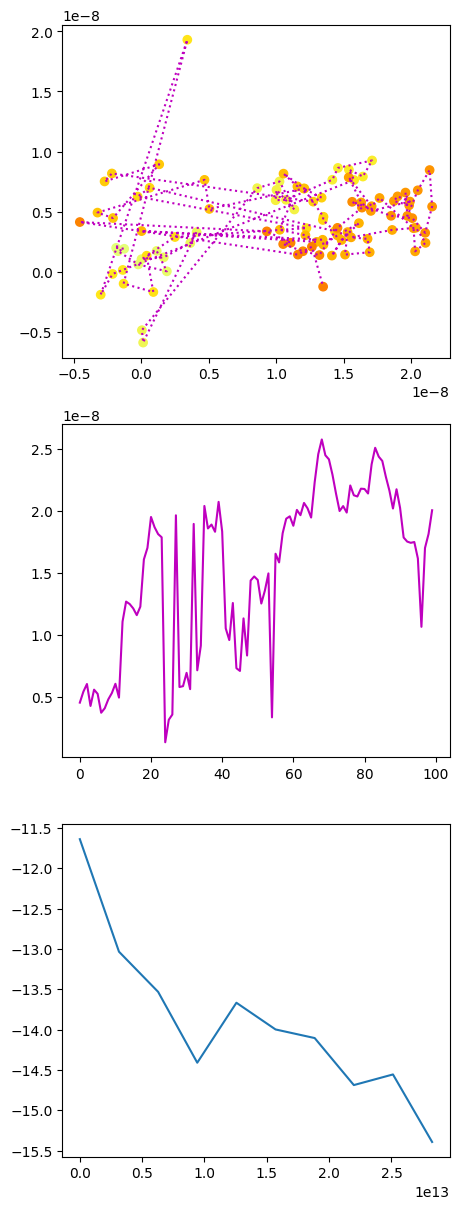

In [216]:
plot_motion(70)

In [182]:
#this data does not need to be sorted because summing over each row, 
#sorting rearranges columns

Dx_all = x_data[:,:,1] 
Dy_all = y_data[:,:,1]
Dz_all = z_data[:,:,1]
Dx_sum = np.sum(Dx_all, axis=1)
Dy_sum = np.sum(Dy_all, axis=1)
Dz_sum = np.sum(Dz_all, axis=1)
dist_all = np.sqrt((Dx_sum**2)+(Dy_sum**2)+(Dz_sum**2))
dist_ave = dist_all/(100) #divide by number of particles


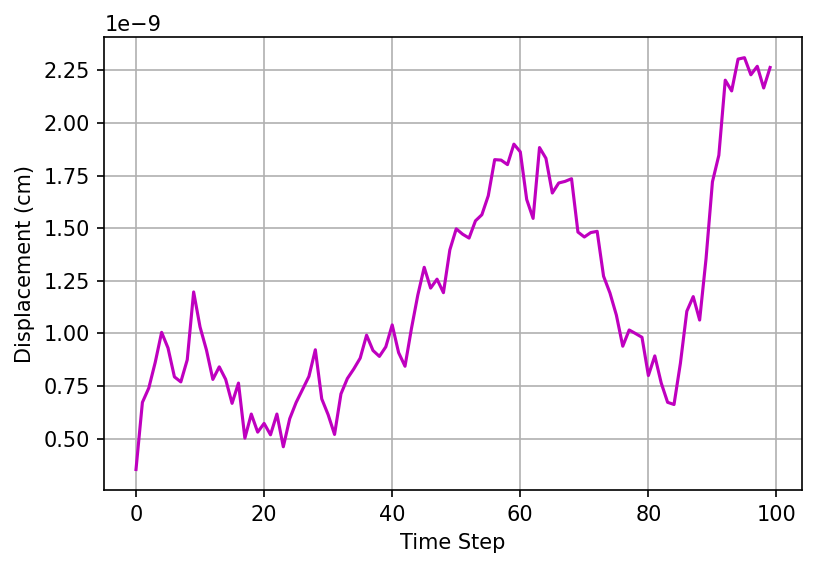

In [183]:
plt.rcParams['figure.dpi'] = 150
line = plt.plot(t_step, dist_ave, '-', c = 'm')
plt.xlabel('Time Step')
plt.ylabel('Displacement (cm)')
plt.grid()

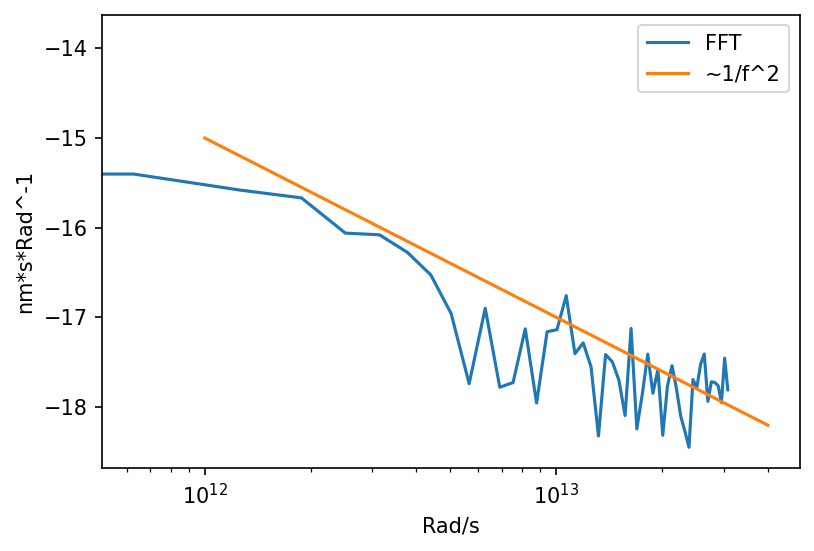

In [173]:
plt.rcParams['figure.dpi'] = 150
yf = fft(dist_ave) # 2nd arg is length of the transformed axis of the output
N = 100
# sample spacing
T = 1e-13 
xf = fftfreq(N, T)[:N//2]*6.28 #?? Hz to Rad/s
plt.plot(xf,np.log10(np.abs(yf[0:N//2])**2), label = 'FFT') #20*np.log10
x = np.linspace(1e12,4e13,100)
plt.plot(x, np.log10(1/(x**2))+9, label = '~1/f^2') #20*np.log10
plt.xscale('log')
plt.xlabel('Rad/s')
plt.ylabel('nm*s*Rad^-1')
plt.legend()
plt.show()

In [124]:
def plot_3d(particle):
    #fig=plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot3D(x_data[:,(particle-1),1], y_data[:,(particle-1),1], z_data[:,(particle-1),1],  ':', c = 'm',
             linewidth = 1)
    p = ax.scatter3D( x_data[:,(particle-1),1],  y_data[:,(particle-1),1], z_data[:,(particle-1),1], s = 15,
                        c = t_step, cmap = 'Wistia');
    plt.xlabel('x')
    plt.ylabel('y')
 

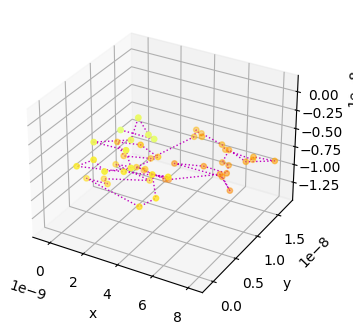

In [125]:
plot_3d(1)

In [14]:
def plot_motion_gb(g_particle, b_particle):
    fig=plt.figure(figsize=(10,10))
    plt.subplot(2, 2, 1)
    scat = plt.scatter( x_data[:,(g_particle-1),0],  y_data[:,(g_particle-1),0], c=t_step, cmap= 'Wistia')
    line = plt.plot(x_data[:,(g_particle-1),0], y_data[:,(g_particle-1),0], ':', c = 'm')
    plt.colorbar(label="Progression in Time", orientation="vertical")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('True Position')
    plt.subplot(2, 2, 2)
    scat = plt.scatter( x_data[:,(g_particle-1),1],  y_data[:,(g_particle-1),1], c=t_step, cmap= 'Wistia')
    line = plt.plot(x_data[:,(g_particle-1),1], y_data[:,(g_particle-1),1], ':', c = 'm')
    plt.colorbar(label="Progression in Time", orientation="vertical")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Relative Position')
    plt.subplot(2, 2, 3)
    scat = plt.scatter( x_data[:,(b_particle-1),0],  y_data[:,(b_particle-1),0], c=t_step, cmap= 'Wistia')
    line = plt.plot(x_data[:,(b_particle-1),0], y_data[:,(b_particle-1),0], ':', c = 'm')
    plt.colorbar(label="Progression in Time", orientation="vertical")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('True Position')
    plt.subplot(2, 2, 4)
    scat = plt.scatter( x_data[:,(b_particle-1),1],  y_data[:,(b_particle-1),1], c=t_step, cmap= 'Wistia')
    line = plt.plot(x_data[:,(b_particle-1),1], y_data[:,(b_particle-1),1], ':', c = 'm')
    plt.colorbar(label="Progression in Time", orientation="vertical")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Relative Position')

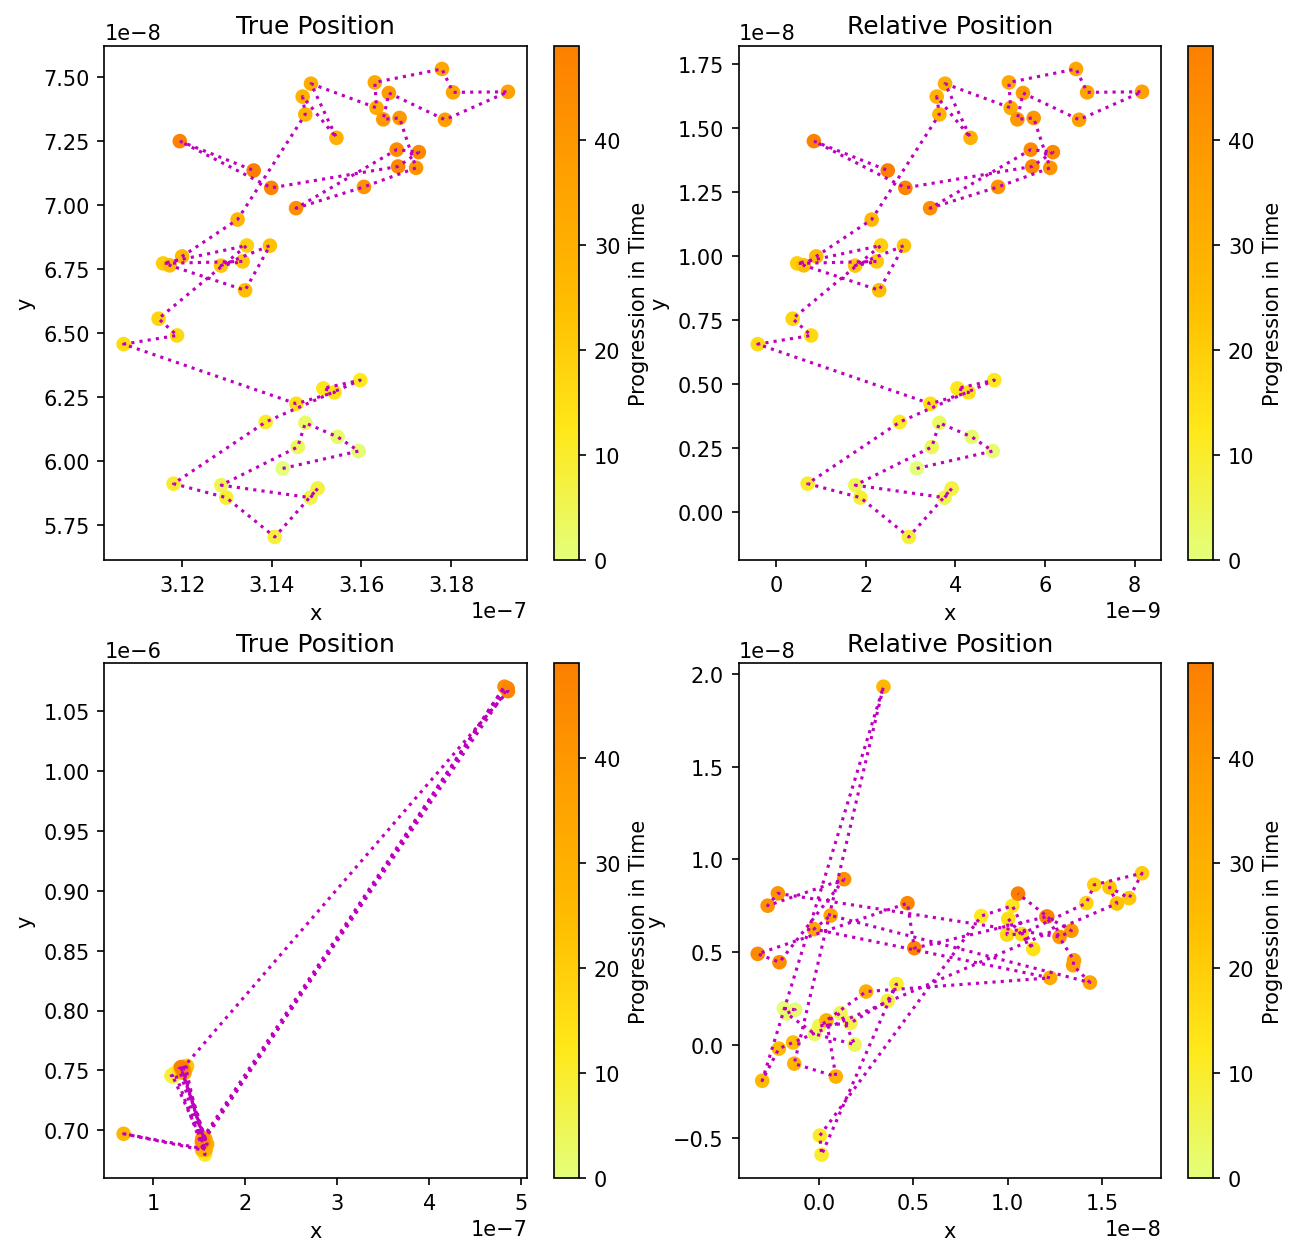

In [15]:
plot_motion_gb(1, 70)

In [148]:
def plot_3d_gb(g_particle, b_particle):
    fig=plt.figure(figsize=(12,12))
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.plot3D(x_data[:,(g_particle-1),0], y_data[:,(g_particle-1),0], z_data[:,(g_particle-1),0],  ':', c = 'm',
             linewidth = 1)
    p = ax.scatter3D( x_data[:,(g_particle-1),0],  y_data[:,(g_particle-1),0], z_data[:,(g_particle-1),0], s = 5,
                        c = t_step, cmap = 'Wistia');
    ax = fig.add_subplot(2, 2, 2, projection='3d')
    ax.plot3D(x_data[:,(g_particle-1),1], y_data[:,(g_particle-1),1], z_data[:,(g_particle-1),1],  ':', c = 'm',
         linewidth = 1)
    p = ax.scatter3D( x_data[:,(g_particle-1),1],  y_data[:,(g_particle-1),1], z_data[:,(g_particle-1),1], s = 5,
                    c = t_step, cmap = 'Wistia');
    ax = fig.add_subplot(2, 2, 3, projection='3d')
    ax.plot3D(x_data[:,(b_particle-1),0], y_data[:,(b_particle-1),0], z_data[:,(b_particle-1),0],  ':', c = 'm',
         linewidth = 1)
    p = ax.scatter3D( x_data[:,(b_particle-1),0],  y_data[:,(b_particle-1),0], z_data[:,(b_particle-1),0], s = 5,
                    c = t_step, cmap = 'Wistia');
    ax = fig.add_subplot(2, 2, 4, projection='3d')
    ax.plot3D(x_data[:,(b_particle-1),1], y_data[:,(b_particle-1),1], z_data[:,(b_particle-1),1],  ':', c = 'm',
         linewidth = 1)
    p = ax.scatter3D( x_data[:,(b_particle-1),1],  y_data[:,(b_particle-1),1], z_data[:,(b_particle-1),1], s = 5,
                    c = t_step, cmap = 'Wistia');
    

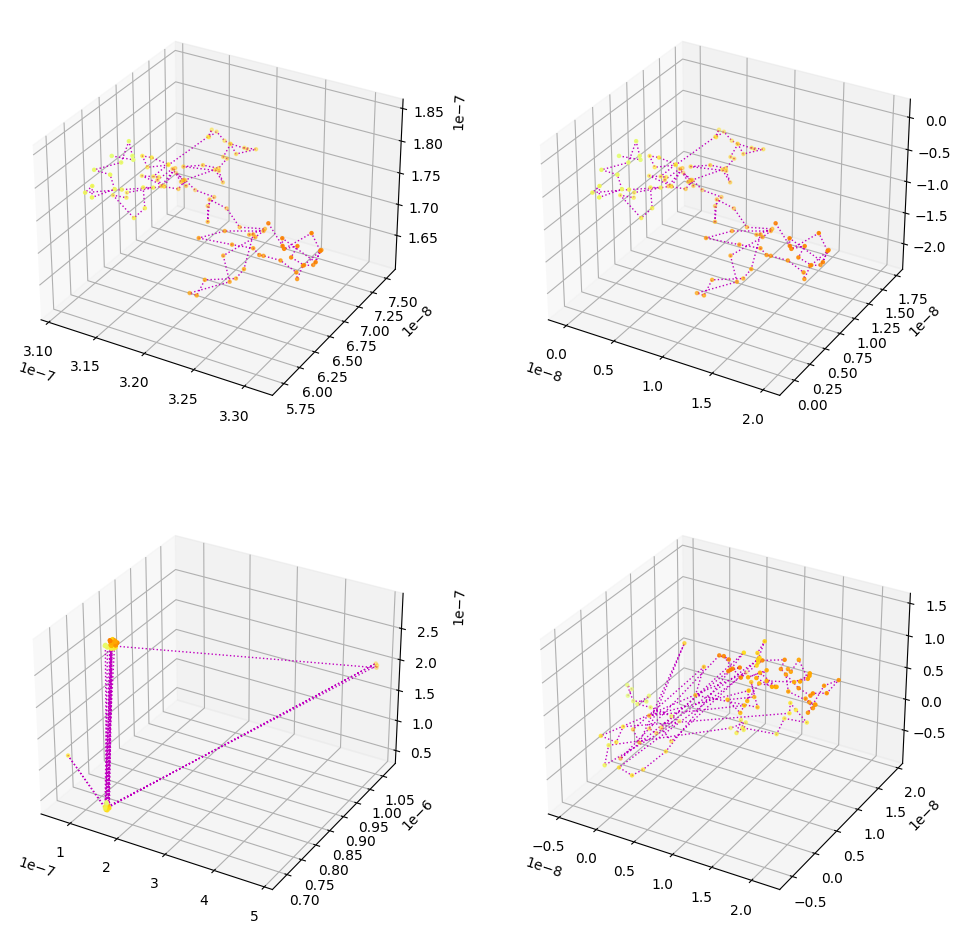

In [149]:
plot_3d_gb(1,70)

In [240]:
def plot_id(particle):
    i = 0
    ts = len(t_step)
    x_id = np.zeros((ts,2))
    y_id = np.zeros((ts,2)) 
    z_id = np.zeros((ts,2))
    ID = p_id[0,particle-1]
    while i < len(p_id):
        id_index = np.where(p_id[i,:] == ID)
        x_id[i,0] = x_data[i, int(id_index[0]),1]
        y_id[i,0] = y_data[i, int(id_index[0]),1]
        z_id[i,0] = z_data[i, int(id_index[0]),1]
        x_id[i,1] = int(id_index[0])
        y_id[i,1] = int(id_index[0])
        z_id[i,1] = int(id_index[0])
        i=i+1   
    fig=plt.figure(figsize=(10,20))
    plt.subplot(3, 1, 1)
    scat = plt.scatter( x_id[:,0], y_id[:,0], c=t_step, cmap= 'Wistia')
    line = plt.plot(x_id[:,0], y_id[:,0], ':', c = 'm')
    plt.colorbar(label="Progression in Time", orientation="vertical")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(3, 1, 2)
    Dx = x_id[:,0]
    Dy = y_id[:,0]
    Dz = y_id[:,0]
    dist = np.sqrt((Dx**2)+(Dy**2)+(Dz**2))
    line = plt.plot(t_step, dist, '-', c = 'm')
    plt.xlabel('Time Step')
    plt.ylabel('Displacement (cm)')
    plt.subplot(3, 1, 3)
    plt.rcParams['figure.dpi'] = 100
    yf = fft(dist) # 2nd arg is length of the transformed axis of the output
    N = 20
    # sample spacing
    T = 1e-13 
    xf = fftfreq(N, T)[:N//2]*6.28
    plt.plot(xf, np.log10(np.abs(yf[0:N//2])**2), label = 'FFT')
    x = np.linspace(5e12,4e13,100)
    plt.plot(x, np.log10((1/x**2))+12, label = '~1/f^2')
    plt.xscale('log')
    plt.xlabel('Rad/s')
    plt.ylabel('cm^2*s*Rad^-1')
    plt.legend()
    plt.show()
   # return x_id, y_id, z_id

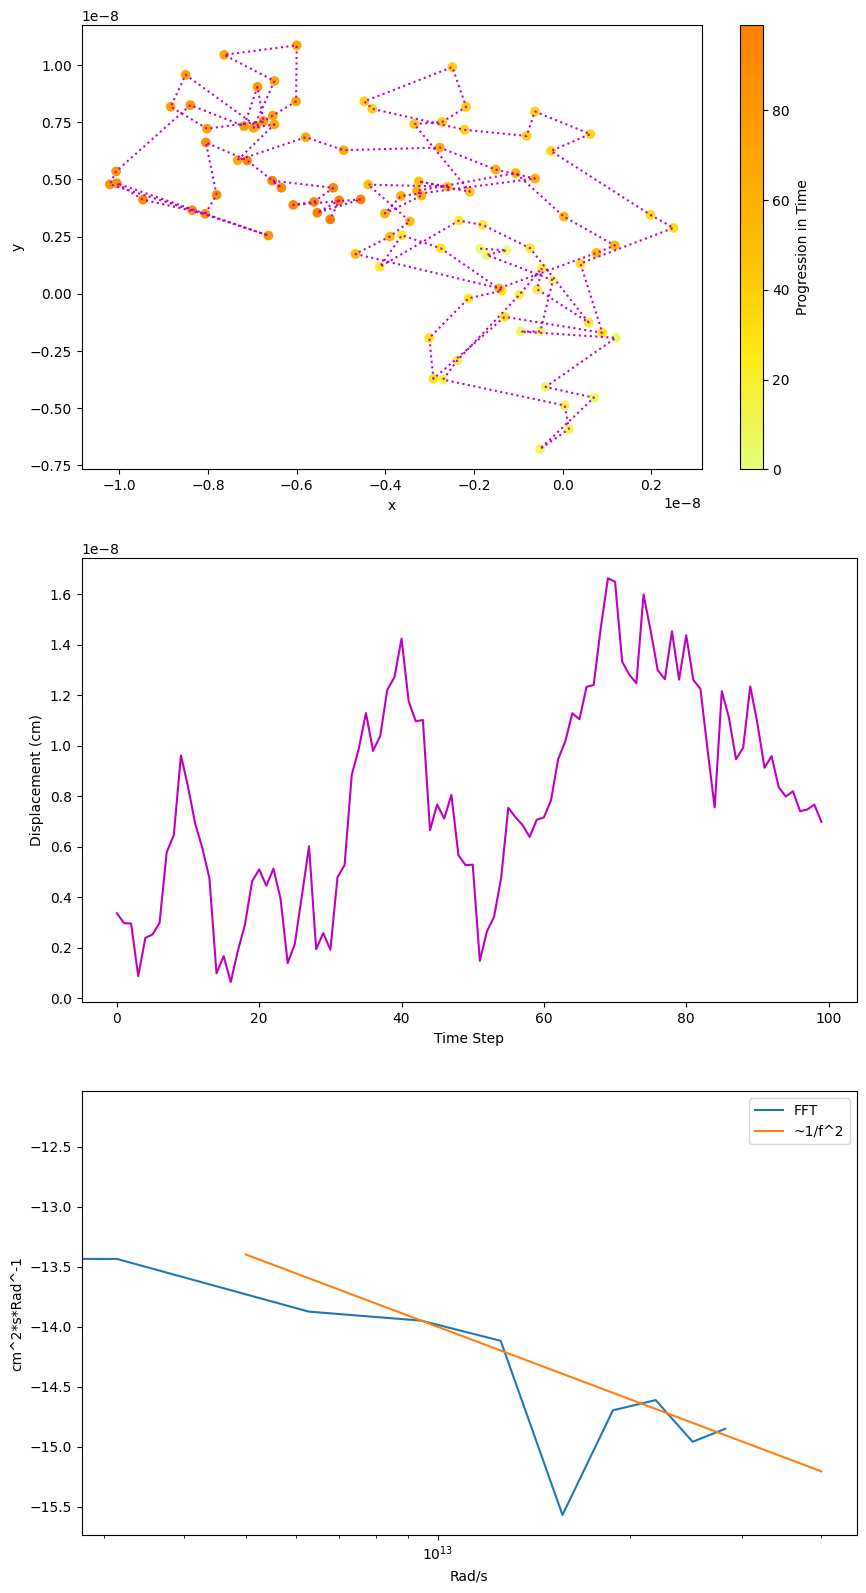

In [241]:
plot_id(70)